# IRIS DATASET

In [42]:
import numpy as np

import pandas as pd
column_names = ['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width','Species']
data = pd.read_csv(r"C:\Users\priyadharshini\iris.csv", names=column_names)
data.head()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [43]:
data["Species"].value_counts()

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Species, dtype: int64

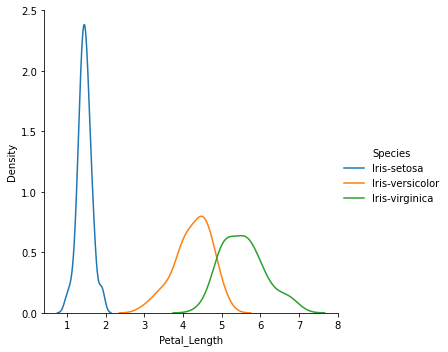

In [47]:
import seaborn as sns
sns.FacetGrid(data, hue="Species", height=5) \
   .map(sns.kdeplot, "Petal_Length") \
   .add_legend()
plt.show()

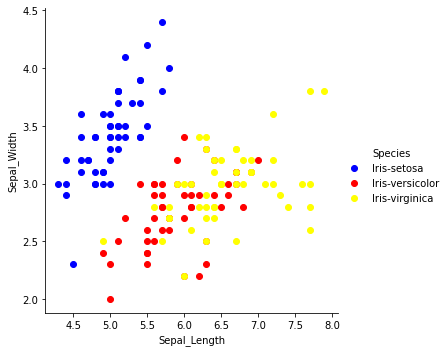

In [49]:
import seaborn as sns
KS = {'color': ['blue', 'red', 'yellow']}
sns.FacetGrid(data, hue_kws=KS, hue="Species", height=5) \
   .map(plt.scatter, "Sepal_Length", "Sepal_Width") \
   .add_legend()
plt.show()

In [45]:
data.describe()

,Sepal_Length,Sepal_Width,Petal_Length,Petal_Width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [46]:
from sklearn.model_selection import train_test_split
X = data[['Sepal_Length','Sepal_Width','Petal_Length','Petal_Width']]
print(X)
y = data['Species']
print(y)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width
0             5.1          3.5           1.4          0.2
1             4.9          3.0           1.4          0.2
2             4.7          3.2           1.3          0.2
3             4.6          3.1           1.5          0.2
4             5.0          3.6           1.4          0.2
..            ...          ...           ...          ...
145           6.7          3.0           5.2          2.3
146           6.3          2.5           5.0          1.9
147           6.5          3.0           5.2          2.0
148           6.2          3.4           5.4          2.3
149           5.9          3.0           5.1          1.8

[150 rows x 4 columns]
0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Species, Length: 150, dtype: obj

In [18]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()
data["Species"] = labelencoder.fit_transform(data["Species"])
print(data)
species = pd.DataFrame({'Species': ['Iris-setosa', 'Iris-versicolor', 'Iris-virginica']})
print(species)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species
0             5.1          3.5           1.4          0.2        0
1             4.9          3.0           1.4          0.2        0
2             4.7          3.2           1.3          0.2        0
3             4.6          3.1           1.5          0.2        0
4             5.0          3.6           1.4          0.2        0
..            ...          ...           ...          ...      ...
145           6.7          3.0           5.2          2.3        2
146           6.3          2.5           5.0          1.9        2
147           6.5          3.0           5.2          2.0        2
148           6.2          3.4           5.4          2.3        2
149           5.9          3.0           5.1          1.8        2

[150 rows x 5 columns]
           Species
0      Iris-setosa
1  Iris-versicolor
2   Iris-virginica


In [20]:
def create_dummies(df,column_name):
    dummies = pd.get_dummies(df[column_name],prefix=column_name)
    df = pd.concat([df,dummies],axis=1)
    print(df)
    return df
data = create_dummies(data,"Species")
print(data)

     Sepal_Length  Sepal_Width  Petal_Length  Petal_Width  Species  Species_0  \
0             5.1          3.5           1.4          0.2        0          1   
1             4.9          3.0           1.4          0.2        0          1   
2             4.7          3.2           1.3          0.2        0          1   
3             4.6          3.1           1.5          0.2        0          1   
4             5.0          3.6           1.4          0.2        0          1   
..            ...          ...           ...          ...      ...        ...   
145           6.7          3.0           5.2          2.3        2          0   
146           6.3          2.5           5.0          1.9        2          0   
147           6.5          3.0           5.2          2.0        2          0   
148           6.2          3.4           5.4          2.3        2          0   
149           5.9          3.0           5.1          1.8        2          0   

     Species_1  Species_2  

In [50]:
# Features before mean normalization
unscaled_features = X_train
# Mean Normalization to have a faster classifier 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
#calculate μ & σ(fit) and apply the transformation(transform)
X_train_array = sc.fit_transform(X_train.values)
# Assign the scaled data to a DataFrame & use the index and columns arguments to keep your original indices and column names:
X_train = pd.DataFrame(X_train_array, index=X_train.index, columns=X_train.columns)
# Center test data with the μ & σ computed (fitted) on training data
X_test_array = sc.transform(X_test.values)
X_test = pd.DataFrame(X_test_array, index=X_test.index, columns=X_test.columns)

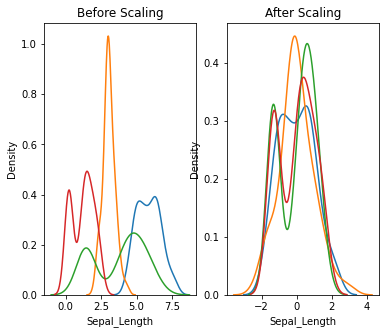

In [53]:
# Before & After Mean normalization
fig, (ax1, ax2) = plt.subplots(ncols=2, figsize=(6, 5))

ax1.set_title('Before Scaling')
sns.kdeplot(unscaled_features['Sepal_Length'], ax=ax1)
sns.kdeplot(unscaled_features['Sepal_Width'], ax=ax1)
sns.kdeplot(unscaled_features['Petal_Length'], ax=ax1)
sns.kdeplot(unscaled_features['Petal_Width'], ax=ax1)

ax2.set_title('After Scaling')
sns.kdeplot(X_train['Sepal_Length'], ax=ax2)
sns.kdeplot(X_train['Sepal_Width'], ax=ax2)
sns.kdeplot(X_train['Petal_Length'], ax=ax2)
sns.kdeplot(X_train['Petal_Width'], ax=ax2)

plt.show()

In [70]:
# Import the model
from sklearn.neural_network import MLPClassifier

# Initializing the multilayer perceptron
mlp = MLPClassifier(solver='sgd', hidden_layer_sizes=(10), max_iter=500, learning_rate_init=0.01)

In [71]:
# Train the model
mlp.fit(X_train, y_train)

# Outputs:
MLPClassifier (activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9, 
beta_2=0.999, early_stopping=False, epsilon=1e-08,       
hidden_layer_sizes=10, learning_rate='constant',      
learning_rate_init=0.01, max_iter=500, momentum=0.9,       
nesterovs_momentum=True, power_t=0.5, random_state=None,       
shuffle=True, solver='sgd', tol=0.0001, validation_fraction=0.1,       
verbose=False, warm_start=False)

MLPClassifier(hidden_layer_sizes=10, learning_rate_init=0.01, max_iter=500,
              solver='sgd')

In [73]:
# Score takes a feature matrix X_test and the expected target values y_test. 
# Predictions for X_test are compared with y_test
print (mlp.score(X_test,y_test))

0.9666666666666667
